In [99]:
import get_api_key  

import base64
from PIL import Image
import get_article 
import encode_base64

import analyze_image
import describe_image
import extract_keywords as ek 

# api config

In [9]:
api_name = 'gpt-4o-mini' 
api_key, api_endpoint = get_api_key.get_api_info(api_name)
client = get_api_key.get_client(api_key, api_endpoint) 
client 

# Image Understaning

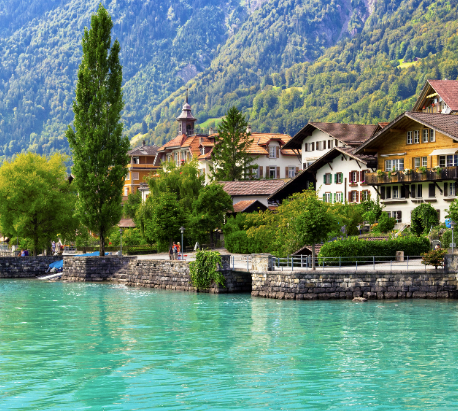

In [16]:
image_path = "your/local/img/path/lake.png" 
image = Image.open(image_path).convert("RGB")  
image   

In [74]:
def prompt_analyze_image(image_path):
    
    image = encode_base64(image_path)
    
    response = client.chat.completions.create(
        model= api_name,
        messages=[
            {"role": "system", "content": "You are an AI assistant that analyzes images and provides detailed descriptions."},
            
            {"role": "user", "content": [
                {"type": "text", "text": "이미지 풍경에서 보이는 특징을 묘사해주세요. 아래에 키워드 추출: 단어, 단어 형태로 출력"},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image}"}}
            ]}
        ],
        max_tokens=300,
    )
    
    return response.choices[0].message.content

In [75]:
img_desc = describe_image.describe_img(image_path)
img_desc

'이미지에서는 맑은 호수가 보이고, 주변에는 푸르른 나무와 아름다운 건물들이 있습니다. 건물들은 전통적인 알프스 스타일로, 나무 재질과 다양한 창문 디자인이 특징입니다. 배경에는 높은 산들이 보이며, 초록색 식생이 가득합니다. 강변에는 산책로와 잔디가 있는 공간이 조성되어 있어 사람들이 산책하고 있습니다.\n\n**키워드 추출:**\n- 맑은 호수\n- 푸르른 나무\n- 전통 건물\n- 알프스 스타일\n- 높은 산\n- 산책로\n- 자연 경관'

# Retrieve relevant contents on Website

In [81]:
# 키워드 추출 -> 키워드에 해당하는 기사 검색 
keywords = ek.extract_keywords(img_desc)
print(keywords)

['맑은 호수', '푸르른 나무', '전통 건물', '알프스 스타일', '높은 산', '산책로', '자연 경관']


In [83]:
contents_keyword = '푸른 호수' 
get_article.search_naver_news(contents_keyword)   

[('창원시, 용지호수공원에 무장애 도시숲 조성한다',
  'https://www.newsis.com/view/NISX20240826_0002862824'),
 ('석촌호수 뜨는 거대 랍스터… 英 팝아티스트 작품이래요',
  'https://www.munhwa.com/news/view.html?no=2024082601071227301001'),
 ('‘톡파원 25시’ 아프리카의 푸른 심장, 우간다 랜선 여행',
  'https://www.bntnews.co.kr/article/view/bnt202408190037'),
 ('[배공순의 두근두근 제주 엿보기] (7) 하늘호수 천지에서 백록담을 그리다',
  'http://www.headlinejeju.co.kr/news/articleView.html?idxno=550791'),
 ('창원시 박진열 푸른도시사업소장 "시민이 체감하는 안전한 도시환경 조성"',
  'https://www.newsfreezone.co.kr/news/articleView.html?idxno=585835'),
 ("광주호 호수생태원·푸른길공원 '아름다운 도시숲 50' 선정",
  'https://www.yna.co.kr/view/AKR20240802095500054?input=1195m'),
 ('[오피니언] 뉴질랜드 여행 기록 - 셋. 테카포 호수와 밤하늘 보호구역 [여행]',
  'https://www.artinsight.co.kr/news/view.php?no=71488'),
 ("광주호 호수생태원·푸른길공원 '아름다운 도시숲 50선' 선정",
  'https://www.newscj.com/news/articleView.html?idxno=3166235'),
 ("광주호·푸른길공원·담양숲 '명품' 인증", 'https://kjmbc.co.kr/NewsArticle/1417455'),
 ("[퐝여행 레시피-포항을 즐기는 10가지 방법] (10) <끝> '그린웨이' 걷기 좋은 길 / 철길숲·솔밭도시숲·호수공원·환호공원",
  'https

In [95]:
import process_article as pa

In [1]:
contents_keyword = '푸른 호수'

#pa.get_article_cleaned(contents_keyword, 0)